In [60]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from bokeh.plotting import figure, output_notebook,show, ColumnDataSource
from bokeh.layouts import widgetbox
from bokeh.models.widgets import DataTable, NumberFormatter, TableColumn
output_notebook()

from k_fold import *
from proj1_helpers import *
from implementations import *
from helpers import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

# Data exploration

In [2]:
y, x, ids = load_csv_data('../data/train.csv')
labels = np.array(np.genfromtxt('../data/train.csv', delimiter=",", names=True).dtype.names[2:])

## Logisitic regression

/home/raph/school/2017-2018/ml/ML_project/scripts/helpers.py:35: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(y.T @ np.log(sigma_xn_w) + (1-y).T @ np.log(1-sigma_xn_w))


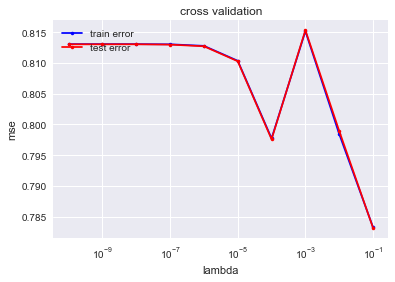

In [53]:
lambdas = np.logspace(-10,-1,10)
rmse_tr = []
rmse_te = []
y_scaled = (y+1)/2.0
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_scaled, x, 5, logistic_regression, compute_loss_logistic, {'initial_w': np.zeros(x.shape[1] + 1), 'max_iters': 10000, 'gamma': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

/home/raph/school/2017-2018/ml/ML_project/scripts/helpers.py:35: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(y.T @ np.log(sigma_xn_w) + (1-y).T @ np.log(1-sigma_xn_w))
/home/raph/school/2017-2018/ml/ML_project/scripts/helpers.py:20: RuntimeWarning: overflow encountered in exp
  return 1.0/(np.exp(-t)+1)


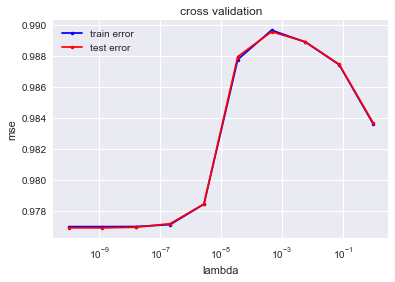

In [89]:
lambdas = np.logspace(-10,0,10)
y_scaled = (y+1)/2.0
x_jet, y_jet = x_y_for_jet(x,y_scaled, 0, False)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, logistic_regression, accuracy, {'initial_w': np.zeros(x_jet.shape[1] + 1), 'max_iters': 100000, 'gamma': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

## Regularized logistic regression

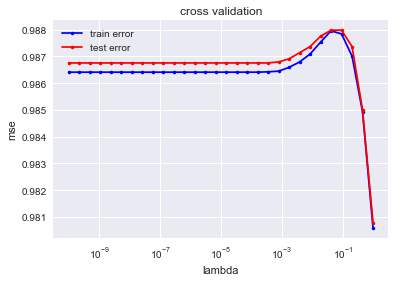

In [85]:
lambdas = np.logspace(-10,0,30)
y_scaled = (y+1)/2.0
x_jet, y_jet = x_y_for_jet(x,y_scaled, 0, False)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 4, reg_logistic_regression, accuracy, {'lambda_': lambda_,'initial_w': np.zeros(x_jet.shape[1] + 1), 'max_iters': 10000, 'gamma': 0.0081491274690207397})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

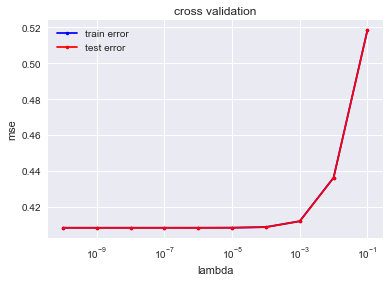

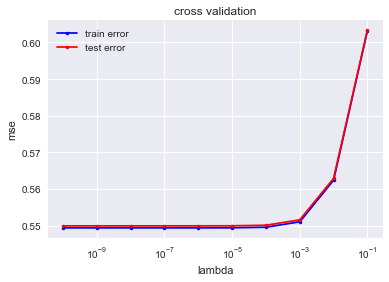

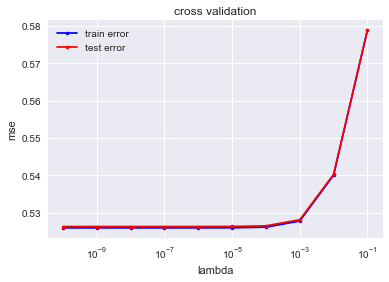

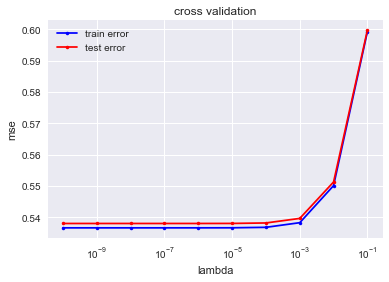

In [58]:
lambdas = np.logspace(-10,-1,10)
def x_y_for_jet(x, y):
    for n in range(4):
        jet_num = x[:, 22] == n
        x_jet = x[jet_num]
        y_jet = y[jet_num]
        jet_mean = np.mean(x_jet, axis=0)
        x_jet = x_jet[:, (jet_mean != -999) & (jet_mean != 0) & (jet_mean != n)]
        yield x_jet, y_jet
y_scaled = (y+1)/2.0

i = 0
for x_jet, y_jet in x_y_for_jet(x,y_scaled):
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 4, reg_logistic_regression, compute_loss_logistic_reg, {'lambda_': lambda_,'initial_w': np.zeros(x_jet.shape[1] + 1), 'max_iters': 10000, 'gamma': 0.0081491274690207397}, {'lambda_': lambda_})
        rmse_tr.append(rmse_tr_)
        rmse_te.append(rmse_te_)
    plt.figure(i)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    plt.plot()
    i += 1

In [144]:
rmse_te

[0.51104651965027259,
 0.51104669898363742,
 0.51104699812787313,
 0.51104749712499653,
 0.51104832948764034,
 0.51104971791108489,
 0.51105203382606401,
 0.51105589668511742,
 0.51106233943238422,
 0.5110730841074288]

## Separating datasets

In [95]:
def index_of(label):
    return np.where(labels == label)[0][0]
print(index_of('PRI_jet_num'))
print(index_of('DER_deltaeta_jet_jet'))
print(index_of('DER_prodeta_jet_jet'))
print(index_of('DER_lep_eta_centrality'))
print(index_of('PRI_jet_leading_pt'))
print(index_of('PRI_jet_leading_eta'))
print(index_of('PRI_jet_leading_phi'))
print(index_of('PRI_jet_subleading_pt'))
print(index_of('PRI_jet_subleading_eta'))
print(index_of('PRI_jet_subleading_phi'))
print(index_of('DER_lep_eta_centrality'))
labels[22]

22
4
6
12
23
24
25
26
27
28
12


'PRI_jet_num'

In [139]:
def x_y_for_jet(n):
    jet_num = x[:, 22] == n
    x_jet = x[jet_num]
    y_jet = y[jet_num]
    jet_mean = np.mean(x_jet, axis=0)
    x_jet = x_jet[:, (jet_mean != -999) & (jet_mean != 0) & (jet_mean != n)]
    return x_jet, y_jet
jet_num = x[:, 22] == 0
x_jet_0 = x[jet_num]
y_jet_0 = y[jet_num]
jet_0_mean = np.mean(x_jet_0, axis=0)
np.where(jet_0_mean != 0)[0]
x_jet_0 = x_jet_0[:,(jet_0_mean != -999) & (jet_0_mean != 0)]
x_y_for_jet(3)[0].shape

(22164, 29)

At 0
At 1
At 2
At 3


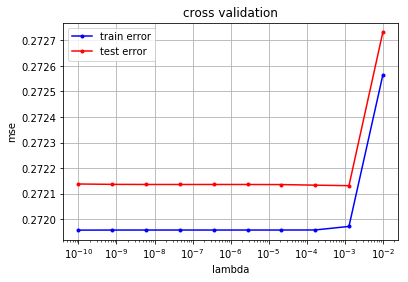

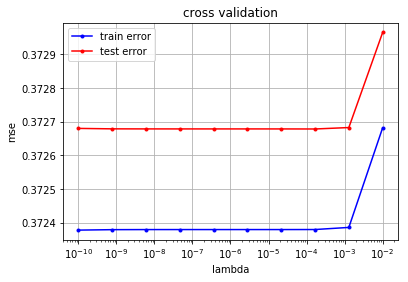

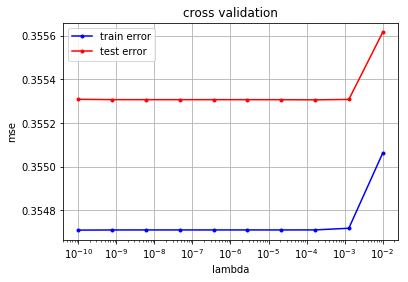

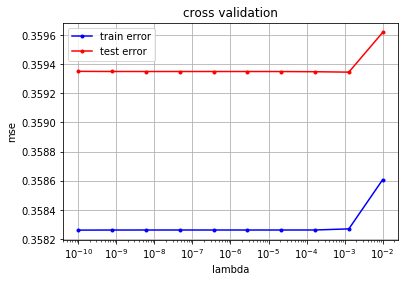

In [136]:
lambdas = np.logspace(-10,-2,10)
for n in range(4):
    rmse_tr = []
    rmse_te = []
    x_jet, y_jet = x_y_for_jet(n)
    for lambda_ in lambdas:
        rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 5, ridge_regression, compute_mse, {'lambda_': lambda_}, seed=5)
        rmse_tr.append(rmse_tr_)
        rmse_te.append(rmse_te_)
    plt.figure(n)
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    plt.plot()
    print("At", n)

In [24]:
# y, x, ids = load_csv_data('../data/train.csv', sub_sample=True)
y, x, ids = load_csv_data('../data/train.csv')
filter_ = [idx for idx, label in enumerate(labels) if not 'phi' in label]
# x = x[:, filter_]
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)
num_samples = len(y)
tx = np.c_[np.ones(num_samples), x]

In [22]:
y = (y+1)/2.0

In [19]:
lambdas = np.logspace(-7,-1,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, tx, 5, logistic_regression, compute_loss_logistic, {'initial_w': np.zeros(tx.shape[1]), 'max_iters': 100000, 'gamma': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)

/home/raph/school/2017-2018/ml/ML_project/scripts/helpers.py:33: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(y.T @ np.log(sigma_xn_w) + (1-y).T @ np.log(1-sigma_xn_w))


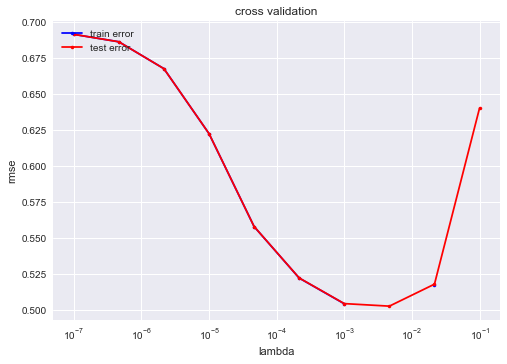

In [20]:
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [17]:
min(rmse_te)

0.50042407943911393

In [21]:
min(rmse_te)

0.50252559564073895

In [33]:
lambdas = np.logspace(-10,-1,5)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, tx, 5, reg_logistic_regression, compute_loss_logistic_reg, {'lambda_': lambda_,'initial_w': np.zeros(tx.shape[1]), 'max_iters': 10000, 'gamma': 0.001}, {'lambda_': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)

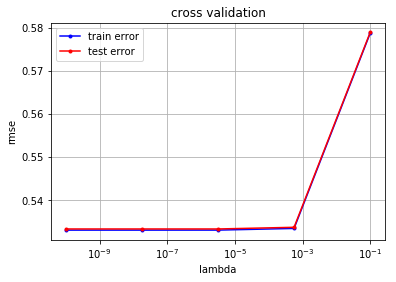

In [34]:
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [111]:
lambdas[np.argmin(rmse_te)]

0.001

In [48]:
lambdas = np.logspace(-10,-2,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x, 5, ridge_regression, compute_mse, {'lambda_': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)

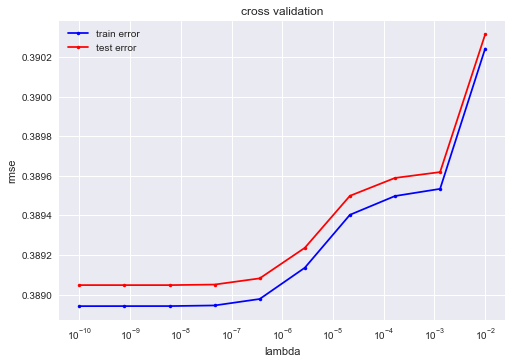

In [49]:
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [45]:
rmse_tr_, rmse_te_ = cross_validation(y, x, 5, least_squares, compute_mse)
print(rmse_tr_,rmse_te_)

0.388940931758 0.389052278846


0.38904858595820857

In [61]:
lambdas = np.logspace(-10,-1,5)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, tx, 5, least_squares_GD, compute_mse, {'initial_w': np.zeros(tx.shape[1]), 'max_iters': 10000, 'gamma': 0.1})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)

In [79]:
rmse_tr_, rmse_te_ = cross_validation(y, tx, 5, least_squares_GD, compute_mse, {'initial_w': np.zeros(tx.shape[1]), 'max_iters': 1000, 'gamma': 0.01})
print(rmse_tr_,rmse_te_)

Stopped at 999 iterations
Stopped at 999 iterations
Stopped at 999 iterations
Stopped at 999 iterations
Stopped at 999 iterations
0.0858090286377 0.0858265140568


In [84]:
rmse_tr_, rmse_te_ = cross_validation(y, tx, 5, least_squares_SGD, compute_mse, {'initial_w': np.zeros(tx.shape[1]), 'max_iters': 1000000, 'gamma': 0.01})
print(rmse_tr_,rmse_te_)

0.160224664826 0.160226146812


In [124]:
lambdas = np.logspace(-10,0,30)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation_group(y, x, 10, ridge_regression, [{'lambda_': lambda_}] * 6)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 18 but corresponding boolean dimension is 30

In [188]:
args = [{'lambda_': 0.031, 'degree': 4}, {'lambda_': 1e-10, 'degree': 5}, {'lambda_': 1.29e-9, 'degree': 6},\
       {'lambda_': 0.00046, 'degree': 5}, {'lambda_': 0.00316, 'degree': 7}, {'lambda_': 2.78255e-6, 'degree': 3}]
x_filtered = x_normalized[:, filter_]
cross_validation_group(y, x_filtered, 10, ridge_regression_with_poly, args)

(0.17775777777777776, 0.17881199999999994)

In [182]:
filter_ = [idx for idx, label in enumerate(labels) if not 'Pri_tau_phi' in label or not 'PRI_lep_phi' in label]

In [187]:
def log_normalize(x):
    if x > 0:
        return np.log(x)
    return x
normalize = [idx for idx, label in enumerate(labels) if label in ['DER_mass_vis', 'PRI_tau_pt', 'PRI_lep_pt',\
                                                                  'PRI_met', 'PRI_jet_subleading_pt', 'DER_mass_MMC',\
                                                                  'DER_mass_vis', 'DER_pt_tot', 'DER_sum_pt',\
                                                                  'DER_pt_ratio_lep_tau', 'PRI_met_sumet',\
                                                                  'PRI_jet_leading_pt']]
# np.apply_along_axis(log_normalize, 0, x[:, normalize])
log_normalize = np.vectorize(log_normalize)
x_normalized = x.copy()
x_normalized[:, normalize] = log_normalize(x_normalized[:, normalize])

11


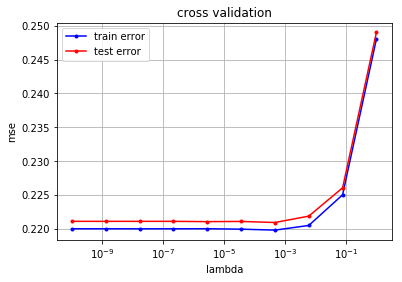

In [184]:
lambdas = np.logspace(-10,0,10)
x_jet, y_jet = x_y_for_jet(x_normalized,y, 1, True)
rmse_tr = []
rmse_te = []
degree = 6
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree},  seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)